In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.figure_factory as ff

from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV                                         # to split the data
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report, fbeta_score     # to evaluate our model

# Algorithmns models to be compared
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

import seaborn as sns

sns.set(rc={'figure.figsize':(10,10)})
sns.set_style("whitegrid")

from sklearn.cluster import KMeans

import plotly.express as px

In [60]:
missing_values = ["n/a", "na"," ","-", "_" ,"--", "NaN", "NA"]
df = pd.read_csv("project_data (1).csv", sep=";",na_values = missing_values)
df

,X01,X02,X03,X04,X05,X06,X07,X08,X09,X10,...,X12,X13,X14,X15,X16,X17,X18,X19,X20,Y
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,...,A121,31,A143,A152,1,A172,1,A191,A201,1
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,...,A122,40,A143,A152,1,A174,1,A192,A201,1
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,...,A123,38,A143,A152,1,A173,1,A191,A201,1
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,...,A124,23,A143,A153,1,A173,1,A192,A201,2


In [61]:
cleanup= {"X01":     {"A11": 1, "A12": 2, "A13": 3, "A14": 4},
                "X03":     {"A30": 0, "A31": 1, "A32": 2, "A33": 3, "A34": 4},        
                "X04":     {"A40": 0, "A41": 1, "A42": 2, "A43": 3, "A44": 4, "A45": 5, "A46": 6, "A47": 7, "A48": 8, "A49": 9, "A410": 10},
                "X06":     {"A61": 1, "A62": 2, "A63": 3, "A64": 4, "A65": 5},
                "X07":     {"A71": 1, "A72": 2, "A73": 3, "A74": 4, "A75": 5},
                "X09":     {"A91": 1, "A92": 2, "A93": 3, "A94": 4, "A95": 5},
                "X10":     {"A101": 1, "A102": 2, "A103": 3},
                "X12":     {"A121": 1, "A122": 2, "A123": 3, "A124": 4},
                "X14":     {"A141": 1, "A142": 2, "A143": 3},
                "X15":     {"A151": 1, "A152": 2, "A153": 3},
                "X17":     {"A171": 1, "A172": 2, "A173": 3, "A174": 4},
                "X19":     {"A191": 1, "A192": 2},
                "X20":     {"A201": 1, "A202": 2},
               }

In [62]:
df = df.replace(cleanup)
df.head()

,X01,X02,X03,X04,X05,X06,X07,X08,X09,X10,...,X12,X13,X14,X15,X16,X17,X18,X19,X20,Y
0,1,6,4,3,1169,5,5,4,3,1,...,1,67,3,2,2,3,1,2,1,1
1,2,48,2,3,5951,1,3,2,2,1,...,1,22,3,2,1,3,1,1,1,2
2,4,12,4,6,2096,1,4,2,3,1,...,1,49,3,2,1,2,2,1,1,1
3,1,42,2,2,7882,1,4,2,3,3,...,2,45,3,3,1,3,2,1,1,1
4,1,24,3,0,4870,1,3,3,3,1,...,4,53,3,3,2,3,2,1,1,2


In [63]:
import plotly.graph_objs as go
import plotly.offline as py 
py.init_notebook_mode(connected=True) 

In [64]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    distortions.append(kmeanModel.inertia_)

Text(0.5, 1.0, 'The Elbow Method showing the optimal k')

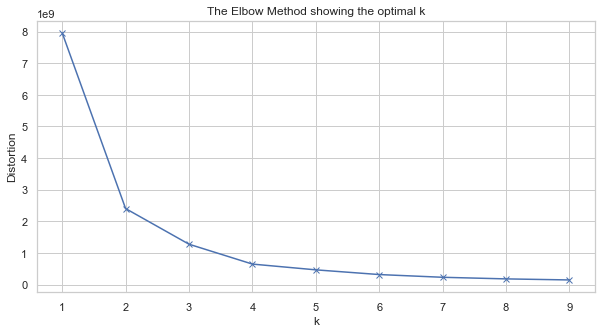

In [65]:
plt.figure(figsize=(10,5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')

In [66]:
# k-means algorithm
k = 4
kmeans = KMeans(n_clusters=k, random_state=0).fit(df)
df['Cluster'] = kmeans.labels_
df['Cluster'] = df['Cluster'].astype('category')

In [67]:

fig = px.scatter_3d(df, x='X13', y='X02', z='X05',
              color='Cluster')
fig.show()

In [68]:
cluster_size = df.groupby(['Cluster'], as_index=False).size()


In [69]:
dfcluster = pd.DataFrame(data=cluster_size ,columns=['count'])

In [70]:
dfcluster 

,count
Cluster,
0,130
1,544
2,42
3,284


In [71]:
dfcluster['count']

Cluster
0    130
1    544
2     42
3    284
Name: count, dtype: int64

In [72]:
dfcluster['Percentage'] = dfcluster['count'] / sum(dfcluster['count'])


In [73]:
dfcluster

,count,Percentage
Cluster,,
0,130,0.130
1,544,0.544
2,42,0.042
3,284,0.284


In [74]:
fig = px.pie(dfcluster, values='Percentage', 
             color_discrete_sequence=px.colors.sequential.RdBu, width=800, height=500,
            title='Size of Each Cluster')
fig.show()

In [75]:
grouped = df.groupby(['Cluster'], as_index=False).mean().round(1)
#grouped.drop(['Job'], axis=1, inplace=True)
grouped

,Cluster,X01,X02,X03,X04,X05,X06,X07,X08,X09,...,X12,X13,X14,X15,X16,X17,X18,X19,X20,Y
0,0,2.5,33.3,2.6,3.0,7127.5,2.4,3.4,2.5,2.7,...,2.9,36.8,2.6,2.0,1.5,3.2,1.2,1.6,1.0,1.4
1,1,2.6,15.1,2.6,2.8,1471.3,2.0,3.4,3.3,2.7,...,2.1,35.6,2.7,1.9,1.4,2.8,1.1,1.3,1.1,1.3
2,2,2.4,40.3,2.3,3.6,12511.7,2.3,3.4,2.4,2.7,...,3.2,36.7,2.5,2.2,1.4,3.4,1.1,1.9,1.0,1.6
3,3,2.6,23.5,2.5,2.7,3587.3,2.1,3.4,2.7,2.6,...,2.5,34.7,2.7,1.9,1.4,3.0,1.2,1.4,1.0,1.3


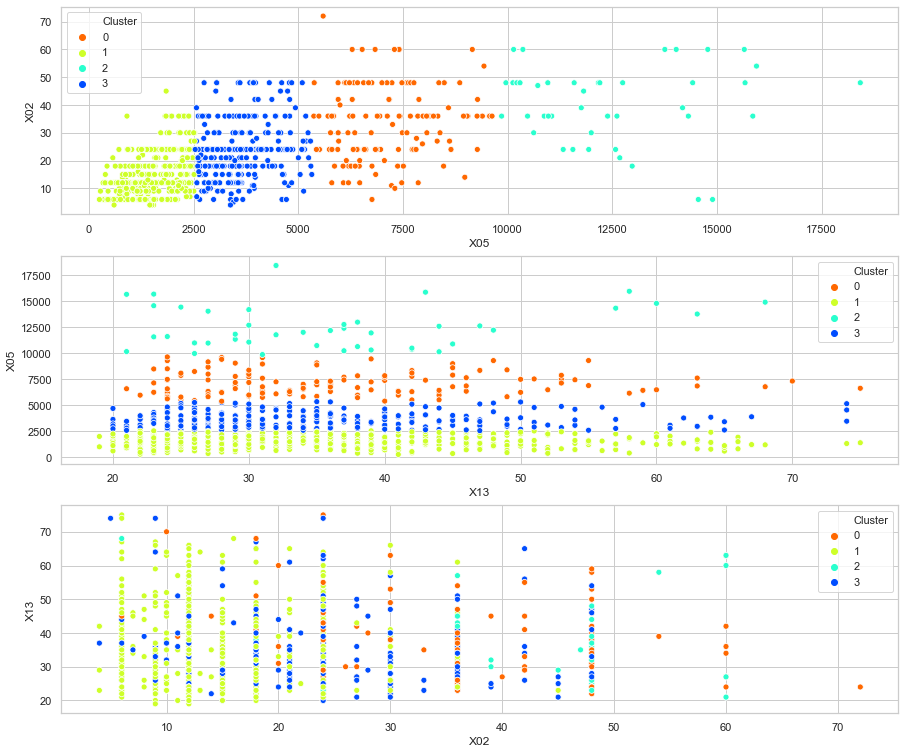

In [76]:

f = plt.figure(figsize=(15,13))
ax = f.add_subplot(311)
ax = sns.scatterplot(x="X05", y="X02", hue='Cluster', data=df, palette="jet_r")
ax = f.add_subplot(312)
ax = sns.scatterplot(x="X13", y="X05", hue='Cluster', data=df, palette="jet_r")
ax = f.add_subplot(313)
ax = sns.scatterplot(x="X02", y="X13", hue='Cluster', data=df, palette="jet_r")


In [77]:
cluster0 = df[df['Cluster']==0]
cluster1 = df[df['Cluster']==1]
cluster2 = df[df['Cluster']==2]
cluster3 = df[df['Cluster']==3]

In [78]:
def get_df(data):
    out = data.value_counts(normalize=True).reset_index()
    return(out)

In [79]:
def plot(x):
    fig = go.Figure()
    fig.add_trace(go.Bar(
        x=get_df(cluster0[x])['index'],
        y=get_df(cluster0[x])[x],
        name='Cluster 0',
        marker_color='mediumaquamarine'
    ))
    fig.add_trace(go.Bar(
        x=get_df(cluster1[x])['index'],
        y=get_df(cluster1[x])[x],
        name='Cluster 1',
        marker_color='steelblue'
    ))
    fig.add_trace(go.Bar(
        x=get_df(cluster2[x])['index'],
        y=get_df(cluster2[x])[x],
        name='Cluster 2',
        marker_color='sandybrown'
    ))
    fig.add_trace(go.Bar(
        x=get_df(cluster3[x])['index'],
        y=get_df(cluster3[x])[x],
        name='Cluster 3',
        marker_color='indianred'
    ))

    fig.update_layout(barmode='group', xaxis_tickangle=45, title=x)
    fig.show()

In [80]:
plot('X04')

In [81]:
plot('X15')

In [82]:
plot('X01')